def read_bucket(bucket_name, blob_name):
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(blob_name)
    return blob.download_as_string().decode('utf-8')

In [ ]:
def blob_exists(bucket_name, blob_name):
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(blob_name)
    return blob.exists()

In [ ]:
data=''
if(blob_exists('traindatab00883865', 'traindata.csv') == True):
    data = read_bucket('traindatab00883865', 'traindata.csv')

In [ ]:
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [ ]:
model=load_glove_model("glove.6B.50d.txt")

Loading Glove Model
400000 words loaded!


In [ ]:
row=data.split("\n")

In [ ]:
list_rows=[ i.split(",") for i in row]

In [ ]:
list_rows[0]

['Current_Word', 'Next_Word', 'Levenshtein_distance']

In [ ]:
traning_df=pd.DataFrame(list_rows,columns=["word1","word2","dis"])

In [ ]:
notfound=0
word1=np.array(traning_df["word1"])
word2=np.array(traning_df["word2"])
dis=np.array(traning_df["dis"])

vec_word1=np.array([])
vec_word2=np.array([])
y=np.array([])
all_words_str=np.array([])
all_words_vect=np.array([])
row=np.array([])
for i in range(len(word1)):
    if word1[i] in model and word2[i] in model:
        temp_row=np.array([])
        temp_row=np.append(temp_row,model[word1[i]] )
        temp_row=np.append(temp_row,model[word1[i]] )
        temp_row=np.append(temp_row,dis[i])
        row=np.append(row,temp_row)
        
        vec_word1= np.append(vec_word1,model[word1[i]] ) 
        vec_word2=np.append(vec_word2,model[word2[i]] )
        y=np.append(y,dis[i])
    else:
        notfound+=1
vec_word2=vec_word2.reshape(-1,50)
vec_word1=vec_word1.reshape(-1,50)
y=y.astype(int)
rows=row.reshape(-1,101).astype(float)

In [ ]:
for i in range(len(word1)):
    if word1[i] in model:
        all_words_str=np.append(all_words_str,word1[i])
        all_words_vect=np.append(all_words_vect,model[word1[i]])
all_words_vect=all_words_vect.reshape(-1,50)    

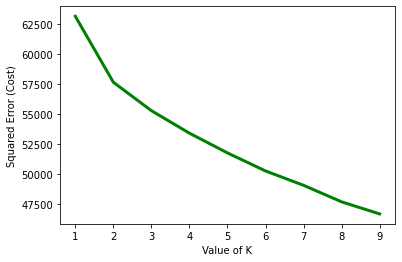

In [ ]:
cost =[]
for i in range(1, 10):
    KM = KMeans(n_clusters = i, max_iter = 1000)
    KM.fit(all_words_vect)
    cost.append(KM.inertia_)    
plt.plot(range(1, 10), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() 
 

In [ ]:
NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(all_words_vect, assign_clusters=True)
words = all_words_str
word_dic={}
for i, word in enumerate(words): 
    if assigned_clusters[i] not in word_dic:
        word_dic[assigned_clusters[i]]=[]
        word_dic[assigned_clusters[i]].append(word)
        continue
    word_dic[assigned_clusters[i]].append(word)

In [ ]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(all_words_vect)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)
silhouette_score = metrics.silhouette_score(all_words_vect, labels, metric='euclidean')

[[ 5.03413879e-01  2.01034021e-01  3.67470882e-01 -1.21930316e-01
   1.36013405e-01 -1.16795134e-01 -6.15255694e-01 -1.29424134e-01
   2.92482430e-01 -3.86177855e-01 -1.12091448e-01 -4.63376953e-01
   1.29545639e-01  4.55389252e-02 -1.70582701e-01  1.76547601e-01
   1.21596610e-02  1.38231589e-01 -5.41449793e-01 -3.81810660e-01
   2.10179326e-01 -6.50683301e-02 -3.52659564e-02  1.35911692e-01
  -1.45939230e-02 -1.03973791e+00 -8.23302748e-02  3.97256344e-01
   4.43725518e-01 -2.09954635e-01  2.77483298e+00 -9.50630106e-02
   2.98948759e-02 -2.89433629e-01  6.05147234e-02  2.34362514e-01
   5.73151770e-02 -3.10827167e-02 -6.20383894e-02  1.99431961e-01
  -5.74427975e-02 -1.98923748e-02  1.56511291e-01  1.29813052e-01
  -8.76403227e-02 -2.12027762e-02 -4.71640831e-02 -4.31538464e-01
  -2.16266784e-02 -4.31138427e-01]
 [ 2.13971042e-01 -4.44120672e-02 -2.91585780e-02 -7.92164033e-02
   6.35491338e-02  1.91937802e-01 -7.54147967e-02 -9.24804296e-02
   1.52390153e-01 -3.60147905e-02 -6.2742

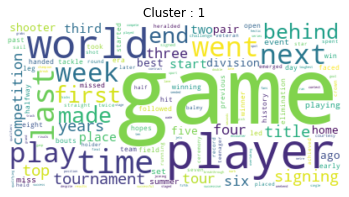

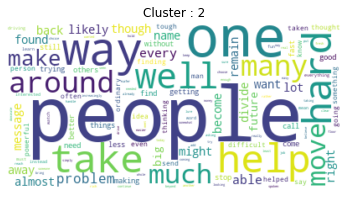

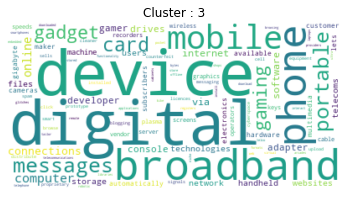

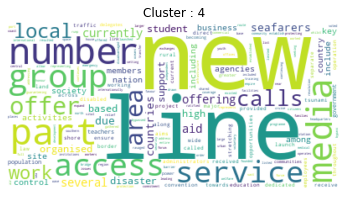

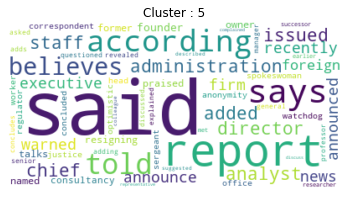

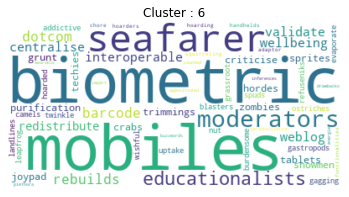

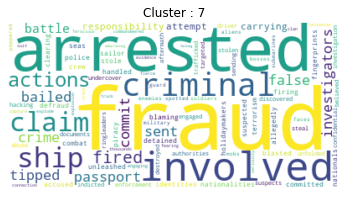

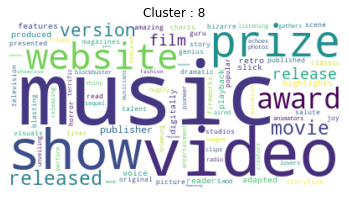

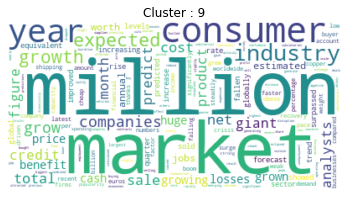

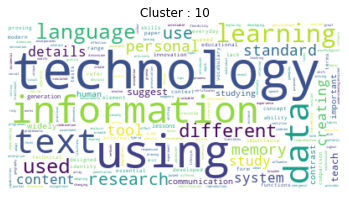

In [ ]:
for j in range(0,10):
    text = " ".join(i for i in word_dic[j])
    word_cloud = wordcloud.WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title("Cluster : "+str(j+1))
    plt.axis("off")
    plt.show()